In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [3]:
%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [4]:
df = pd.read_csv("car_data.csv")

In [5]:
df.head(2)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0


In [6]:
mileage = df[['Mileage']]
price = df[['Price']]

In [14]:
reg1 = linear_model.LinearRegression()
reg1.fit(mileage, price)
print(reg1.score(df[["Mileage"]], df[["Price"]]))

0.0204634473235


###This linear projection scores .02 above.  
###It does not seem to work well for Price and Mileage alone.  We will need to add in the other data to get better predictions.  I would guess Model will make a huge difference, but we shall see.

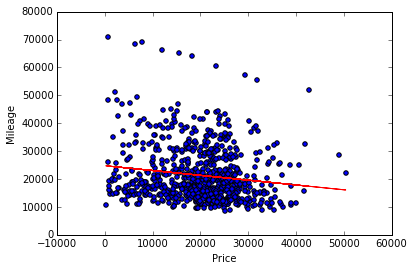

In [13]:
plt.scatter(mileage,price)
plt.ylabel("Mileage")
plt.xlabel("Price")
plt.plot(mileage, reg1.predict(mileage), color='red', linewidth=1)

### A pivot table of price and mileage grouped by model.  The price/mileage definitely is impacted by model.

In [9]:
pivot = pd.pivot_table(df, index=["Model"], values=["Price", "Mileage"])
pivot.describe()

,Mileage,Price
count,32.000000,32.000000
mean,19555.553542,24601.979674
std,1839.996311,11688.667735
min,12961.900000,10752.833305
25%,18802.650000,15962.492604
50%,19810.241667,20409.733129
75%,20989.900000,30125.338454
max,21982.750000,62938.736572


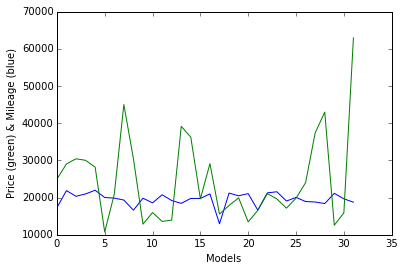

In [12]:
plt.ylabel('Price (green) & Mileage (blue)');
#ylabel('Mileage', color = 'blue');
plt.xlabel("Models")
plt.plot(pivot)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.



In [16]:
df.head(2)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0


In [29]:
input_data = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
price = df[['Price']]

In [30]:
reg1 = linear_model.LinearRegression()
reg1.fit(input_data, price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Price predicted on all available numeric data.

In [34]:
#plt.plot(reg1.predict(input_data))
reg1.predict([8000, 6, 3.1, 4, 1, 1, 1])

array([[ 27188.2419098]])